Используя датасет из лабораторной работы №1, построить модель K-means. Проанализировать результаты, сравнив их с методами обучения с учителем (результатами первой лабораторной работы): например, переиндексировать кластеры относительно исходной нумерации, сравнить поклассово, определить причины расхождений, в т.ч. массовые или критические, при их наличии.

Сделать выводы (подтвердить/опровергнуть разницу в подходах и их взаимозаменяемости).



Часть из 1 лабы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('wifi_localization.txt', header=None, sep='	')
data.columns = ['Connect_1', 'Connect_2', 'Connect_3', 'Connect_4' , 'Connect_5', 'Connect_6', 'Connect_7', 'Rooms']


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

feature = data.drop('Rooms', axis=1)
target = data['Rooms']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)
print('\nLogisticRegression:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, y_pred)}')

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)
y_pred = dtc.predict(X_test_scaled)
print('\nDecisionTreeClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, y_pred)}')

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print('\nKNeighborsClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, y_pred)}')



LogisticRegression:

Accuracy: 0.9725
Precision: 0.9735
Recall: 0.9725
F1 score: 0.9726
confusion_matrix: 
 [[102   0   1   1]
 [  0  88   7   0]
 [  0   2  86   0]
 [  0   0   0 113]]

DecisionTreeClassifier:

Accuracy: 0.9825
Precision: 0.9831
Recall: 0.9825
F1 score: 0.9825
confusion_matrix: 
 [[104   0   0   0]
 [  0  90   5   0]
 [  1   0  87   0]
 [  1   0   0 112]]

KNeighborsClassifier:

Accuracy: 0.9725
Precision: 0.9736
Recall: 0.9725
F1 score: 0.9727
confusion_matrix: 
 [[103   0   1   0]
 [  0  89   6   0]
 [  0   2  86   0]
 [  1   0   1 111]]


K-means

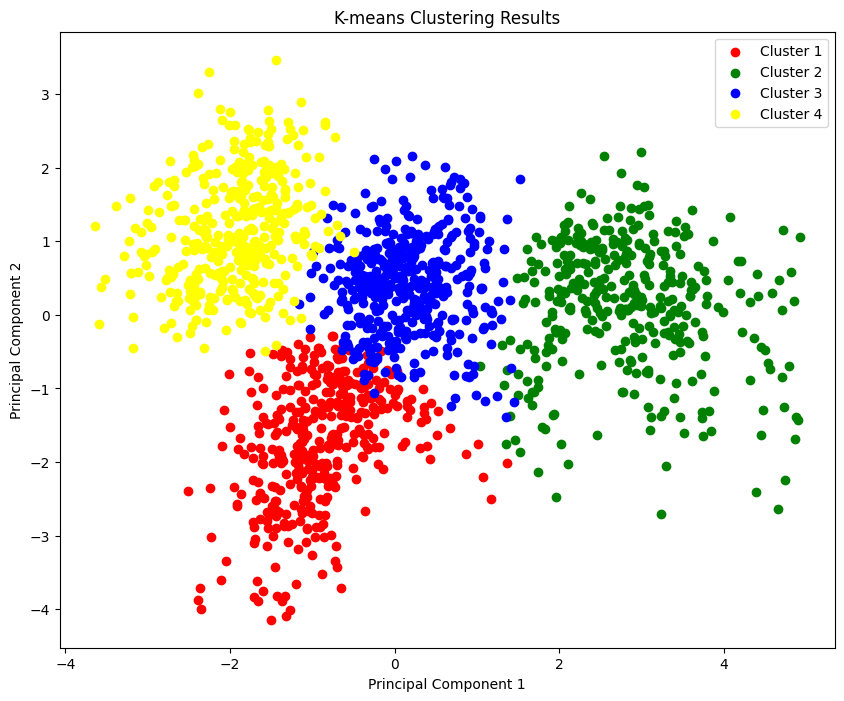

Silhouette Score: 0.2991
Davies-Bouldin Index: 1.2044
Calinski-Harabasz Index: 833.7631


In [3]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'yellow']
for i in range(k):
    cluster_points = X_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title("K-means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



silhouette = silhouette_score(X_train_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_train_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_train_scaled, clusters)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

Silhouette Score: 0.2991 - этот показатель указывает на относительно плохое качество кластеризации. Значение ниже 0.5 обычно считается плохим. ( метрика, которая помогает оценить качество разделения данных на кластеры. Она измеряет, насколько хорошо каждая точка соответствует своему кластеру.)


Davies-Bouldin Index: 1.2044- этот показатель также указывает на плохое качество кластеризации. Значение выше 1 обычно считается плохим. (метрика, которая оценивает качество разделения данных на кластеры, основываясь на сравнении внутри-кластерных и между-кластерных расстояний. )


Calinski-Harabasz Index: 833.7631 - это значение выше среднего, оно является плохим. ( метрика, которая оценивает качественное разделение данных на кластеры, основываясь на соотношению между внутриметодовой суммой квадратов и между-методовой суммой квадратов. )

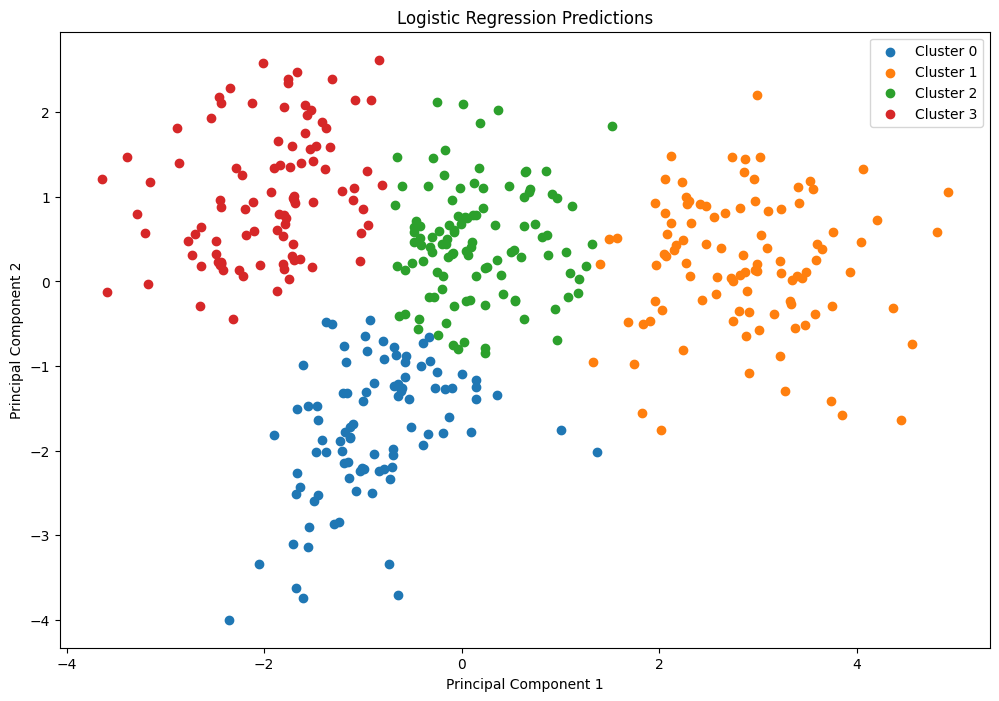

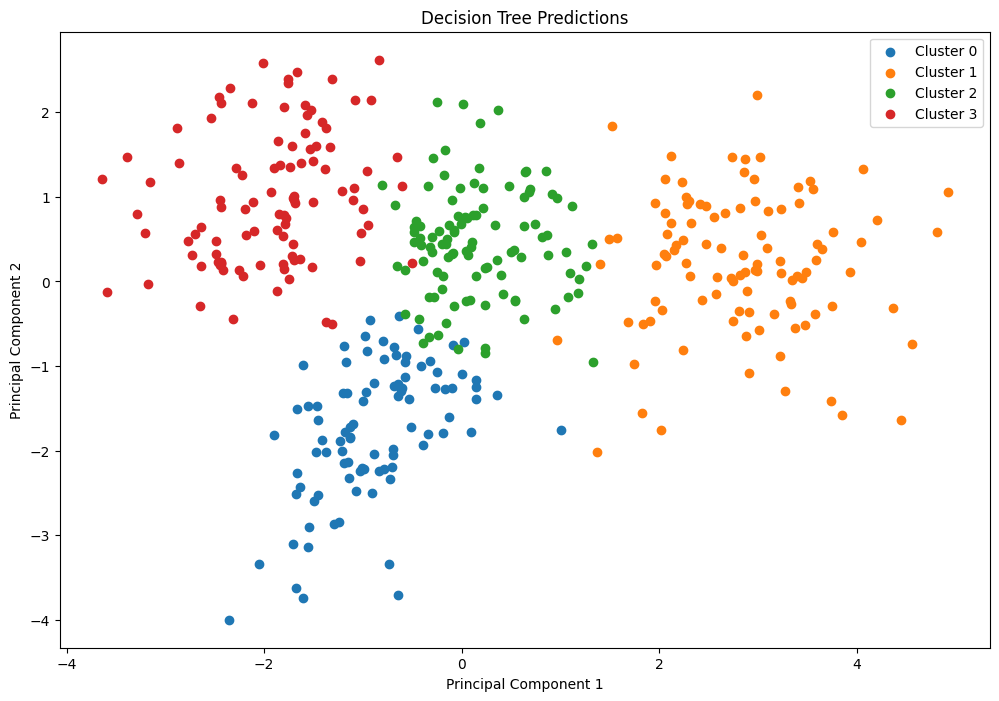

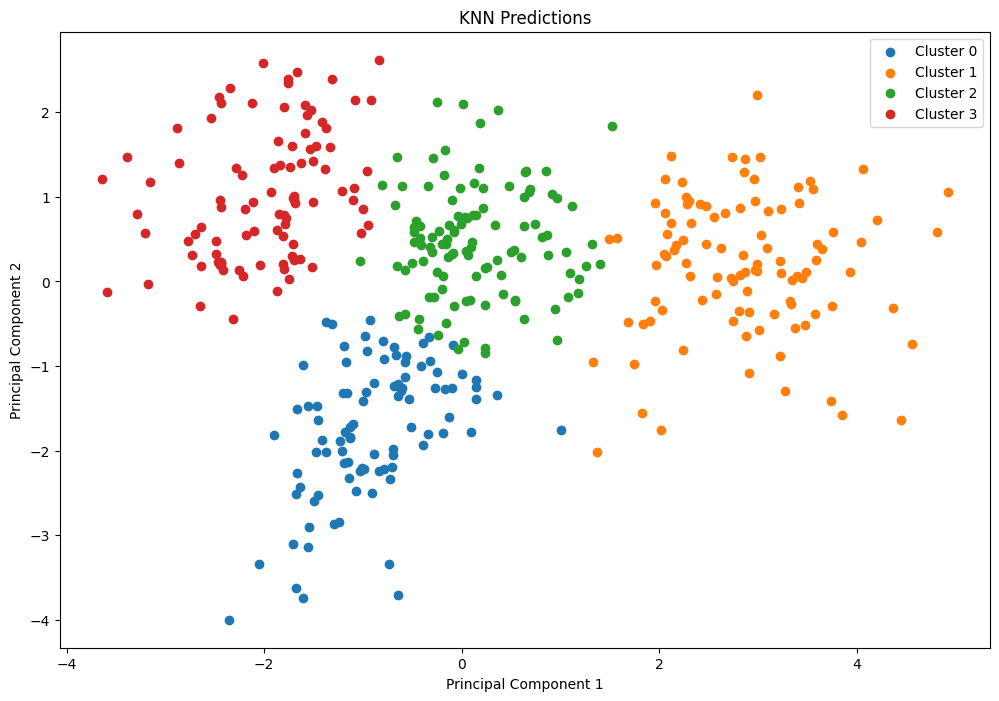

Количество критических расхождений:
Cluster 0:
Logistic Regression: 19
Decision Tree: 17
KNN: 19

Cluster 1:
Logistic Regression: 26
Decision Tree: 25
KNN: 25

Cluster 2:
Logistic Regression: 30
Decision Tree: 26
KNN: 26

Cluster 3:
Logistic Regression: 23
Decision Tree: 27
KNN: 28



In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, clusters, test_size=0.25, random_state=42)

logr = LogisticRegression(random_state=42).fit(X_train_pca, y_train)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train_pca, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)

y_pred_logr = logr.predict(X_test_pca)
y_pred_dtc = dtc.predict(X_test_pca)
y_pred_knn = knn.predict(X_test_pca)

def analyze_discrepancies(cluster_labels, y_pred, k): # Анализ расхождений между предсказаниями и реальными кластерами
    discrepancies = []
    for i in range(k):
        scaled_clusters_i = cluster_labels == i
        cluster_points = X_pca[scaled_clusters_i]
        test_points = X_test_pca[y_pred == i]
        cluster_center = np.mean(cluster_points, axis=0)
        test_center = np.mean(test_points, axis=0)
        cluster_distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
        test_distances = np.linalg.norm(test_points - test_center, axis=1)
        std_cluster = np.std(cluster_distances)
        std_test = np.std(test_distances)
        critical_threshold = 1.5 * max(std_cluster, std_test)
        common_indices = np.intersect1d(np.where(cluster_distances <= critical_threshold)[0],np.where(test_distances > critical_threshold)[0])
        discrepancy = len(common_indices)
        discrepancies.append(discrepancy)
    return discrepancies


discrepancies_logr = analyze_discrepancies(clusters, y_pred_logr, len(set(clusters)))
discrepancies_dtc = analyze_discrepancies(clusters, y_pred_dtc, len(set(clusters)))
discrepancies_knn = analyze_discrepancies(clusters, y_pred_knn, len(set(clusters)))

def plot_clusters(model_name, y_pred):
    plt.figure(figsize=(12, 8))
    for i in range(len(set(clusters))):
        cluster_points = X_test_pca[y_pred == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    plt.title(f'{model_name} Predictions')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

plot_clusters('Logistic Regression', y_pred_logr)
plot_clusters('Decision Tree', y_pred_dtc)
plot_clusters('KNN', y_pred_knn)

print("Количество критических расхождений:")
for i in range(len(set(clusters))):
    print(f"Cluster {i}:")
    print(f"Logistic Regression: {discrepancies_logr[i]}")
    print(f"Decision Tree: {discrepancies_dtc[i]}")
    print(f"KNN: {discrepancies_knn[i]}")
    print()



*   Качество кластеризации можно оценить как плохое. Улучшение метода кластеризации или использования дополнительных признаков может помочь улучшить результаты.
Модели предсказания (Logistic Regression, Decision Tree и KNN) показывают схожую производительность, что говорит о надежности результатов.


*   Некоторые кластеры (особенно Cluster 2) имеют больше критических расхождений, что может указывать на их менее четкую структуру или большую вариативность внутри кластера.


*   Некоторые кластеры (особенно Cluster 2) имеют больше критических расхождений, что может указывать на их менее четкую структуру или большую вариативность внутри кластера.


*   Cluster 0 имеет наименьшее количество расхождений, что может указывать на более четкую структуру или меньшую вариативность внутри кластера.

Результаты не показывают явного лидера среди моделей предсказания, но все модели демонстрируют схожую эффективность в выявлении критических расхождений.




 Несмотря на различия в подходах к задаче выявления критических расхождений, все три использованные метода показали высокую степень взаимозаменяемости и схожую эффективность. Это позволяет рекомендовать использование любого из этих методов без значительной потери в качестве результата. При выборе конкретного метода следует учитывать не только его эффективность, но и такие факторы как сложность модели, время выполнения, необходимость в тонкой настройке и удобство интерпретации результатов.